In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Data Visualization

In [3]:
df = pd.read_csv('Final_Data.csv')
df = df[:1496]
print(df)

                     Date     Open     High      Low    Close      Volume  \
0     10/21/2016 16:00:00  2139.43  2142.63  2130.09  2141.16   654860857   
1     10/24/2016 16:00:00  2148.50  2154.79  2146.91  2151.33   523564705   
2     10/25/2016 16:00:00  2149.72  2151.44  2141.93  2143.16   530792143   
3     10/26/2016 16:00:00  2136.97  2145.73  2131.59  2139.43   562087522   
4     10/27/2016 16:00:00  2144.06  2147.13  2132.52  2133.04   614708800   
...                   ...      ...      ...      ...      ...         ...   
1491   9/26/2022 16:00:00  3682.72  3715.67  3644.76  3655.04  2634968922   
1492   9/27/2022 16:00:00  3686.44  3717.53  3623.29  3647.29  2548804869   
1493   9/28/2022 16:00:00  3651.94  3736.74  3640.61  3719.04  2637914627   
1494   9/29/2022 16:00:00  3687.01  3687.01  3610.40  3640.47  2601213630   
1495   9/30/2022 16:00:00  3633.48  3671.44  3584.13  3585.62  3146085245   

      Previous Day Close  Previous Week Close  Previous Day Interest (EFFR)

# Data Pre-Processing

## Features Engineering

Adding feature to capture volatility of the day

In [4]:
df['Day Range'] = df['High'] - df['Low']

Converting Dates to Month and Day Columns

In [5]:
dates = df["Date"].str.split('/').to_numpy()
months = [int(i[0]) for i in dates]
day = [int(i[1]) for i in dates]
df["Months"] = pd.DataFrame(months)
df["Day"] = pd.DataFrame(day)

data = df.drop(columns = ["Date"])
X = data.drop(columns = ["Label: Next Month Opening"])
y = df["Label: Next Month Opening"]

Split into training and testing data

In [6]:
X_train = X[:1475]
y_train = y[:1475]
X_test = X[1475:]
y_test = y[1475:]

# Neural Network

## Original data, no normalization, no hyperparameter tuning

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
r2_avg = 0
mse_avg = 0
for i in range(100):
    rgr = MLPRegressor().fit(X_train, y_train)
    y_pred = rgr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_avg += r2
    mse_avg += mean_squared_error(y_test, y_pred)

r2_avg = r2_avg/100
mse_avg = mse_avg/100
print(r2_avg, mse_avg)

-105102.37556116418 860727634.4452158


## Feature Selection

In [9]:
from itertools import chain, combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

set_lst = []

for item in list(powerset([4, 7, 8, 10, 11 ,12])):
    set_lst.append(list(item))

print(set_lst)

[[], [4], [7], [8], [10], [11], [12], [4, 7], [4, 8], [4, 10], [4, 11], [4, 12], [7, 8], [7, 10], [7, 11], [7, 12], [8, 10], [8, 11], [8, 12], [10, 11], [10, 12], [11, 12], [4, 7, 8], [4, 7, 10], [4, 7, 11], [4, 7, 12], [4, 8, 10], [4, 8, 11], [4, 8, 12], [4, 10, 11], [4, 10, 12], [4, 11, 12], [7, 8, 10], [7, 8, 11], [7, 8, 12], [7, 10, 11], [7, 10, 12], [7, 11, 12], [8, 10, 11], [8, 10, 12], [8, 11, 12], [10, 11, 12], [4, 7, 8, 10], [4, 7, 8, 11], [4, 7, 8, 12], [4, 7, 10, 11], [4, 7, 10, 12], [4, 7, 11, 12], [4, 8, 10, 11], [4, 8, 10, 12], [4, 8, 11, 12], [4, 10, 11, 12], [7, 8, 10, 11], [7, 8, 10, 12], [7, 8, 11, 12], [7, 10, 11, 12], [8, 10, 11, 12], [4, 7, 8, 10, 11], [4, 7, 8, 10, 12], [4, 7, 8, 11, 12], [4, 7, 10, 11, 12], [4, 8, 10, 11, 12], [7, 8, 10, 11, 12], [4, 7, 8, 10, 11, 12]]


Best features:
[7, 8, 10, 11]


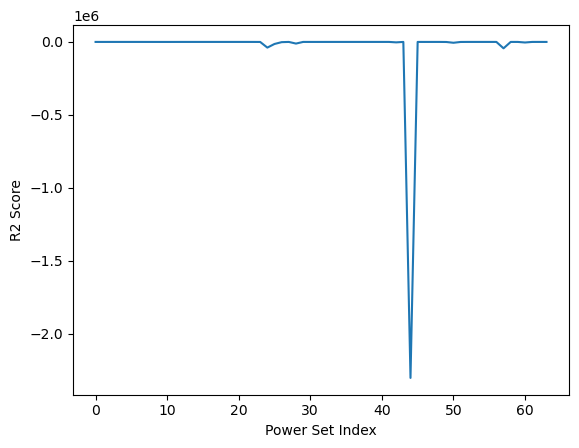

In [46]:
max_scores = {}
scores = []
lsts = []
for lst in set_lst:
    X_train = data.iloc[:1475 , [0] + lst]
    X_test = data.iloc[1475:1496, [0] + lst]
    rgr = MLPRegressor(max_iter=10000).fit(X_train, y_train)
    y_pred = rgr.predict(X_test)
    score = r2_score(y_test,y_pred)
    scores.append(score)
    lsts.append(lst)
max_scores[(max(scores))] = scores.index(max(scores))

print("Best features:")
print(lsts[scores.index(max(scores))])

x = list(range(0, len(scores)))
plt.plot(x, scores)
plt.xlabel("Power Set Index")
plt.ylabel("R2 Score")
plt.show()

In [10]:
X_train_f = data.iloc[:1475 , [0, 7, 8, 10, 11]]
X_test_f = data.iloc[1475:1496, [0, 7, 8, 10, 11]]
print(X_train_f)

         Open  Previous Day Interest (EFFR)  Previous Mo. Inflation (CPI)  \
0     2139.43                          0.41                           2.2   
1     2148.50                          0.41                           2.2   
2     2149.72                          0.41                           2.2   
3     2136.97                          0.41                           2.2   
4     2144.06                          0.41                           2.2   
...       ...                           ...                           ...   
1470  4153.26                          2.33                           5.9   
1471  4198.74                          2.33                           5.9   
1472  4034.58                          2.33                           5.9   
1473  4041.25                          2.33                           5.9   
1474  4000.67                          2.33                           5.9   

      Day Range  Months  
0         12.54      10  
1          7.88      10

In [30]:
r2_avg = 0
mse_avg = 0
for i in range(100):
    rgr = MLPRegressor(max_iter=10000).fit(X_train_f, y_train)
    y_pred = rgr.predict(X_test_f)
    r2 = r2_score(y_test, y_pred)
    r2_avg += r2
    mse_avg += mean_squared_error(y_test, y_pred)

r2_avg = r2_avg/100
mse_avg = mse_avg/100
print(r2_avg, mse_avg)

-7.835391985036582 72356.05899499543


## Normalize data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_f)
X_train_norm = scaler.transform(X_train_f)
X_test_norm = scaler.transform(X_test_f)

In [48]:
r2_avg = 0
mse_avg = 0
for i in range(5):
    rgr = MLPRegressor(max_iter=10000).fit(X_train_norm, y_train)
    y_pred = rgr.predict(X_test_norm)
    r2 = r2_score(y_test, y_pred)
    r2_avg += r2
    mse_avg += mean_squared_error(y_test, y_pred)

r2_avg = r2_avg/5
mse_avg = mse_avg/5
print(r2_avg, mse_avg)

-4.924220903399993 48515.47932584682


## Hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes': [(500,), (100,100), [50,50,50,50,50]], 'learning_rate_init': [0.001, 0.0001], 'solver': ['lbfgs', 'sgd', 'adam']}

rgr = MLPRegressor(max_iter=10000)
clf = GridSearchCV(rgr, parameters)
clf.fit(X_train_norm, y_train)
print(clf.best_params_)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergenc

In [ ]:
r2_avg = 0
mse_avg = 0
for i in range(1):
    rgr = MLPRegressor(hidden_layer_sizes=(100,100), learning_rate_init=0.0001, max_iter=10000).fit(X_train_norm, y_train)
    y_pred = rgr.predict(X_test_norm)
    r2_avg += r2_score(y_test, y_pred)
    mse_avg += mean_squared_error(y_test, y_pred)

r2_avg = r2_avg/1
mse_avg = mse_avg/1
print(r2_avg, mse_avg)

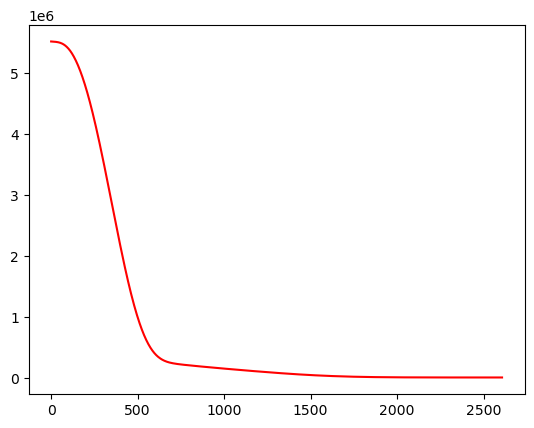

In [19]:
rgr = MLPRegressor(hidden_layer_sizes=(100,100), learning_rate_init=0.0001, max_iter=10000).fit(X_train_norm, y_train)
rgr.score(X_train_norm, y_train)
plt.plot(rgr.loss_curve_, 'r', label="train")   

y_pred = rgr.predict(X_test_norm)
#plt.plot(rgr.loss_curve_, 'b', label="test")

plt.show()